In [2]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dframe_Q1 = pd.read_excel('Input.xlsx')
dframe_Q1

,Threshold,TP,FN,FP,TN,Correct,Incorrect,test Set,Precision,Recall/TPR,F1 Measure,FPR,MisDetection
0,1,20,80,2,98,100,100,200,0.909091,0.20,0.327869,0.02,0.80
1,5,50,50,5,95,100,100,200,0.909091,0.50,0.645161,0.05,0.50
2,10,60,40,10,90,100,100,200,0.857143,0.60,0.705882,0.10,0.40
3,15,80,20,20,80,100,100,200,0.800000,0.80,0.800000,0.20,0.20
4,20,88,12,30,70,100,100,200,0.745763,0.88,0.807339,0.30,0.12
5,25,90,10,40,60,100,100,200,0.692308,0.90,0.782609,0.40,0.10
6,30,95,5,50,50,100,100,200,0.655172,0.95,0.775510,0.50,0.05
7,35,96,4,60,40,100,100,200,0.615385,0.96,0.750000,0.60,0.04
8,40,97,3,70,30,100,100,200,0.580838,0.97,0.726592,0.70,0.03
9,50,98,2,80,20,100,100,200,0.550562,0.98,0.705036,0.80,0.02


### Q2: ROC Curve

Text(0, 0.5, 'True Positive Rate')

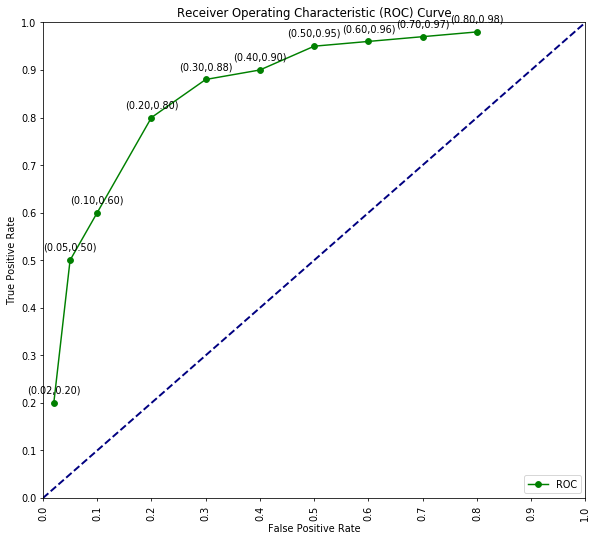

In [4]:
plt.figure(figsize=(10,9),dpi=70)
X = dframe_Q1['FPR']
Y = dframe_Q1['Recall/TPR']
plt.plot(X,Y,color='green', label='ROC', marker = 'o')
plt.plot([0, 1], [0, 1], color='navy',  lw=2,linestyle='--')

plt.xticks(np.arange(0,1.1,0.1), rotation = 'vertical')
plt.yticks(np.arange(0,1.1,0.1), rotation= 'horizontal')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.margins(0.05, 0.1)

for x,y in zip(X,Y):
    label = '('+str("{:.2f}".format(x))+','+str("{:.2f}".format(y))+')'
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Q3: DET Curve

Text(0, 0.5, 'MisDetection Rate %')

<Figure size 1000x900 with 0 Axes>

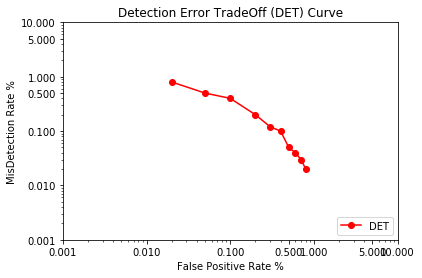

In [6]:
from matplotlib import pyplot as plt
import matplotlib

plt.figure(figsize=(10,9),dpi=100)
#plt.figure()
X = dframe_Q1['FPR']
Y = dframe_Q1['MisDetection']

#print(X,Y)

fig,ax = plt.subplots()
plt.plot(X,Y,color='red', label='DET', marker = 'o')

plt.yscale('log')
plt.xscale('log')

ticks_to_use = [0.001,0.01,0.1,0.5,1,5,10]

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xticks(ticks_to_use)
ax.set_yticks(ticks_to_use)

plt.legend(loc="lower right")
plt.title('Detection Error TradeOff (DET) Curve')
plt.xlabel('False Positive Rate %')
plt.ylabel('MisDetection Rate %')